In [178]:
import pandas as pd
from tqdm import tqdm
import numpy as np
%matplotlib inline  
import featuretools as ft
#import pandas_profiling

In [179]:
#read in weekly data
df_main = pd.read_csv('C:/Users/andrea.constantinof/Documents/ISS/Mops/data/mops_wk_2016_2017.csv')

## Add sales type features

In [180]:
data = pd.read_csv('C:\\Users\\andrea.constantinof\\Documents\\ISS\\Mops\\data\\2018.05.24 - Reg POS Data MOPS Extract.csv')

In [181]:
pnumtoid = pd.read_csv('C:\\Users\\andrea.constantinof\\Documents\\ISS\\Mops\\data\\mops_pnumtoid.csv')

In [182]:
 df_main_id = pd.merge(df_main, pnumtoid, on = ['PRODUCT_ID'], how = 'left')

In [183]:
df_feat = pd.read_csv('C:/Users/andrea.constantinof/Documents/ISS/Mops/data/mops_SaleType_feat.csv')

In [184]:
df_feat.head()

STORE_ID  PRODUCT_ID  CLNDR_MTH_NUM  C445_WK_NUM  C445_YR_NUM  \
0     28040     1597047              2            7         2016   
1     29043     1596749              2            7         2016   
2     30014    28942010              2            7         2016   
3     28072     1595962              2            7         2016   
4     29044     1823181              2            6         2016   

   CLEARANCE_IND  INSTORE_IND  PROMO_IND  REGULAR_IND  OTHER_IND  \
0            0.0          0.0        0.0          4.0        0.0   
1            0.0          0.0        0.0          7.0        0.0   
2            0.0          0.0        0.0          1.0        0.0   
3            0.0          0.0        0.0          1.0        0.0   
4            0.0          0.0        0.0          1.0        0.0   

   REGULAR_PROMO_IND  
0                4.0  
1                7.0  
2                1.0  
3                1.0  
4                1.0

In [185]:
df_main = pd.merge(df_main_id, df_feat, on = ['STORE_ID','PRODUCT_ID','CLNDR_MTH_NUM','C445_WK_NUM','C445_YR_NUM'], how = 'inner')

In [186]:
df_main = pd.merge(df_main, data, on = ['PRODUCT_NUM', 'C445_WK_NUM', 'C445_YR_NUM'], how = 'left')

In [187]:
df_main.head()

CLNDR_MTH_NUM  C445_WK_NUM  C445_YR_NUM  STORE_ID  PRODUCT_ID  \
0              2            6         2016     28081  1501077005   
1              2            6         2016     30058   113595066   
2              2            6         2016     30042     1597029   
3              2            7         2016     30067     1596961   
4              2            7         2016     30268     1595325   

               FINELINE_NM                BRAND_NM  \
0  Quick Clean Mop Refills                   FRANK   
1                     Mops                   FRANK   
2                     Mops  NATIONAL, VENDOR BRAND   
3                     Mops                   FRANK   
4  Quick Clean Mop Refills  NATIONAL, VENDOR BRAND   

   ITEM_ACTUAL_SELLING_PRICE_AMT  QTY_SOLD  PRODUCT_NUM  \
0                           4.99       1.0      1421646   
1                          19.99       1.0      1421573   
2                           9.99       6.0       429543   
3                          11.05       3.0       429475   
4                          12.59       2.0       427681   

              ...              TPvLP_R52_AVG_RTL_INV  R52_AVG_RTL_INV_DOLLARS  \
0             ...                           0.000000                 0.000000   
1             ...                           0.000000             33921.768462   
2             ...                           0.840632             70493.780000   
3             ...                           1.020987             59455.563077   
4             ...                           1.029241             61685.755192   

   LP_R52_AVG_RTL_INV_DOLLARS  TPvLP_R52_AVG_RTL_INV_DOLLARS  \
0                    0.000000                       0.000000   
1                    0.000000                       0.000000   
2                84708.742500                       0.832190   
3                52665.852308                       1.128921   
4                60872.131154                       1.013366   

   R52_POS_UNIT_GROSS  LP_R52_POS_UNIT_GROSS  TPvLP_R52_POS_UNIT_GROSS  \
0                   0                      0                  0.000000   
1                6464                      0                  0.000000   
2               43726                  38986                  1.121582   
3               18529                  24121                  0.768169   
4               21257                  19014                  1.117966   

  R52_POS_DOLLAR_GROSS  LP_R52_POS_DOLLAR_GROSS  TPvLP_R52_POS_DOLLAR_GROSS  
0                 0.00                     0.00                    0.000000  
1            126988.74                     0.00                    0.000000  
2            424603.68                385516.45                    1.101389  
3            312373.26                358418.08                    0.871533  
4            298537.96                275276.76                    1.084501  

[5 rows x 88 columns]

In [188]:
#read in sales type features
cat_features = list(df_main.columns[df_main.dtypes == 'object'])
cat_features

['FINELINE_NM',
 'BRAND_NM',
 'SUBCATEGORY_NM',
 'DEAL_KIND_CD',
 'FLYER_TYPE_NM',
 'FLYER_SLOT_PRIORITY_CD',
 'HOLIDAY',
 'CORPORATE_STATUS_CD',
 'DIVISION_CD',
 'LOB_CD',
 'KVI_IND',
 'PRODUCT_TYPE_CD',
 'ONLINEONLY_IND',
 'OGBB',
 'BRAND_TYPE_CD',
 'PRODUCT_PROFILE',
 'CONSUMER_ROLE']

In [189]:
features = list(df_main.columns)

In [176]:
#Create new features list
#new_features = list(df_main.columns)
#for x in ['CLNDR_MTH_NUM','C445_WK_NUM','C445_YR_NUM','STORE_ID','PRODUCT_ID']:
 #   new_features.remove(x)

## Engineer Key feature: Competitor prices

In [190]:
#Using fineline as competitor group

#Groupby to get prices mean and sum
df_gb_price_mean = df_main[['STORE_ID','FINELINE_NM','CLNDR_MTH_NUM','C445_WK_NUM','C445_YR_NUM','ITEM_ACTUAL_SELLING_PRICE_AMT']].groupby(['STORE_ID','FINELINE_NM','CLNDR_MTH_NUM','C445_WK_NUM','C445_YR_NUM']).mean().reset_index()
df_gb_price_mean.rename(columns = {'ITEM_ACTUAL_SELLING_PRICE_AMT':'AVG_COMPT_PRICE'}, inplace = True)
df_gb_price_sum = df_main[['STORE_ID','FINELINE_NM','CLNDR_MTH_NUM','C445_WK_NUM','C445_YR_NUM','ITEM_ACTUAL_SELLING_PRICE_AMT']].groupby(['STORE_ID','FINELINE_NM','CLNDR_MTH_NUM','C445_WK_NUM','C445_YR_NUM']).sum().reset_index()
df_gb_price_sum.rename(columns = {'ITEM_ACTUAL_SELLING_PRICE_AMT':'SUM_COMPT_PRICE'}, inplace = True)

#merge onto main
df_main = pd.merge(df_main, df_gb_price_mean, on = ['STORE_ID','FINELINE_NM','CLNDR_MTH_NUM','C445_WK_NUM','C445_YR_NUM'], how = 'left')
df_main = pd.merge(df_main, df_gb_price_sum, on = ['STORE_ID','FINELINE_NM','CLNDR_MTH_NUM','C445_WK_NUM','C445_YR_NUM'], how = 'left')

#create price to competition ratio
df_main['price_to_comp_ratio'] = df_main['ITEM_ACTUAL_SELLING_PRICE_AMT']/df_main['AVG_COMPT_PRICE']

In [191]:
#add to new features list
features.append('AVG_COMPT_PRICE')
features.append('SUM_COMPT_PRICE')
features.append('price_to_comp_ratio')

In [ ]:
df_main.head()


## Make a feature list - add new features and remove store id and features we will not predict

In [192]:
#features and categorical features separated
#Original vanilla features from weekly data
#features = ['CLNDR_MTH_NUM', 'C445_WK_NUM', 'STORE_ID', 'PRODUCT_ID',
 #      'FINELINE_NM', 'BRAND_NM', 'ITEM_ACTUAL_SELLING_PRICE_AMT']
#cat_features = ['FINELINE_NM','BRAND_NM']
#key_cols = ['CLNDR_MTH_NUM','C445_WK_NUM','C445_YR_NUM','STORE_ID','PRODUCT_ID']

#add new features
#for x in new_features:
    #features.append(x)

#Remove features we cannot predict
features.remove('OTHER_IND')
features.remove('STORE_ID')
features.remove('QTY_SOLD')

In [193]:
features

['CLNDR_MTH_NUM',
 'C445_WK_NUM',
 'C445_YR_NUM',
 'PRODUCT_ID',
 'FINELINE_NM',
 'BRAND_NM',
 'ITEM_ACTUAL_SELLING_PRICE_AMT',
 'PRODUCT_NUM',
 'CLEARANCE_IND',
 'INSTORE_IND',
 'PROMO_IND',
 'REGULAR_IND',
 'REGULAR_PROMO_IND',
 'SUBCATEGORY_CD',
 'SUBCATEGORY_NM',
 'FINELINE_CD',
 'FNLN_SEASONAL_PROFILE',
 'FNLN_SEASONAL_SLOPE',
 'CATEGORY_CD',
 'BUSCAT_SEASONAL_PROFILE',
 'BUSCAT_SEASONAL_SLOPE',
 'DEAL_KIND_CD',
 'FLYER_TYPE_NM',
 'SPACE_RATIO',
 'SLOT_COUNT',
 'FLYER_SHOW_LIST_BINARY',
 'FLYER_SLOT_PRIORITY_CD',
 'PRICING_EDLP_IND',
 'SAVE_STORY',
 'PROMO_WK_FLAG',
 'SO_QTY',
 'STATUS_COUNT_ACTIVE',
 'STATUS_COUNT_DWO',
 'COUNT_NEWSKU_ACTIVE',
 'STATUS_COUNT_ACTIVE_BUSCAT',
 'STATUS_COUNT_DWO_BUSCAT',
 'COUNT_NEWSKU_ACTIVE_BUSCAT',
 'NEW_PCT_OF_ASSORT_FNLN',
 'DWO_PCT_OF_ASSORT_FNLN',
 'NEW_PCT_OF_ASSORT_BUSCAT',
 'DWO_PCT_OF_ASSORT_BUSCAT',
 'STORE_DAY_CLOSURES',
 'HOLIDAY_COUNT',
 'HOLIDAY',
 'AVG_MAX_TEMP',
 'AVG_MIN_TEMP',
 'TOTAL_RAIN',
 'TOTAL_SNOW',
 'TOTAL_NEW_RAIN',
 'TO

In [194]:
# make dictionary for category
cat_dict = {}

for col in cat_features:
    cat_dict[col] = {}
    count = 0
    for label in list(df_main[col].unique()):
        cat_dict[col][label] = count
        count += 1
    
def convert_cat(col, label):
    return (cat_dict[col][label])

for col in cat_features:
    df_main[col] = df_main[col].apply(lambda x: convert_cat(col,x))

In [195]:
#Make training and test set
df_train = df_main[(df_main['C445_YR_NUM']<2017)]
df_test = df_main[(df_main['C445_YR_NUM']>=2017)]


In [196]:
len(df_main)

1739387

In [197]:
len(df_train)

880225

In [198]:
len(df_test)

859162

In [199]:
#seems to have an NA value...  ##################################################

df_test = df_test.replace(np.inf,5)
df_test = df_test.replace(-np.inf,-5)
df_test = df_test.dropna()

df_train = df_train.replace(np.inf,5)
df_train = df_train.replace(-np.inf,-5)
df_train = df_train.dropna()

In [200]:
features

['CLNDR_MTH_NUM',
 'C445_WK_NUM',
 'C445_YR_NUM',
 'PRODUCT_ID',
 'FINELINE_NM',
 'BRAND_NM',
 'ITEM_ACTUAL_SELLING_PRICE_AMT',
 'PRODUCT_NUM',
 'CLEARANCE_IND',
 'INSTORE_IND',
 'PROMO_IND',
 'REGULAR_IND',
 'REGULAR_PROMO_IND',
 'SUBCATEGORY_CD',
 'SUBCATEGORY_NM',
 'FINELINE_CD',
 'FNLN_SEASONAL_PROFILE',
 'FNLN_SEASONAL_SLOPE',
 'CATEGORY_CD',
 'BUSCAT_SEASONAL_PROFILE',
 'BUSCAT_SEASONAL_SLOPE',
 'DEAL_KIND_CD',
 'FLYER_TYPE_NM',
 'SPACE_RATIO',
 'SLOT_COUNT',
 'FLYER_SHOW_LIST_BINARY',
 'FLYER_SLOT_PRIORITY_CD',
 'PRICING_EDLP_IND',
 'SAVE_STORY',
 'PROMO_WK_FLAG',
 'SO_QTY',
 'STATUS_COUNT_ACTIVE',
 'STATUS_COUNT_DWO',
 'COUNT_NEWSKU_ACTIVE',
 'STATUS_COUNT_ACTIVE_BUSCAT',
 'STATUS_COUNT_DWO_BUSCAT',
 'COUNT_NEWSKU_ACTIVE_BUSCAT',
 'NEW_PCT_OF_ASSORT_FNLN',
 'DWO_PCT_OF_ASSORT_FNLN',
 'NEW_PCT_OF_ASSORT_BUSCAT',
 'DWO_PCT_OF_ASSORT_BUSCAT',
 'STORE_DAY_CLOSURES',
 'HOLIDAY_COUNT',
 'HOLIDAY',
 'AVG_MAX_TEMP',
 'AVG_MIN_TEMP',
 'TOTAL_RAIN',
 'TOTAL_SNOW',
 'TOTAL_NEW_RAIN',
 'TO

# Modelling

## Random Forest Regressor

In [201]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=0, n_estimators=30, n_jobs = -1)
rfr.fit(df_train[features],df_train['QTY_SOLD'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [202]:
predict = rfr.predict(df_test[features])

In [22]:
len(df_test)

NameError: name 'df_test' is not defined

# Results

## Weekly results

In [24]:
df_test

NameError: name 'df_test' is not defined

In [203]:
df_results = pd.DataFrame()
df_results['prediction'] = predict
df_results['actual'] = df_test['QTY_SOLD'].values
df_results['abs_diff'] = abs(df_results['actual'] - df_results['prediction'])
df_results['diff'] = df_results['actual'] - df_results['prediction']
df_results['pct_diff'] = df_results['diff']/df_results['actual']
df_results['pct_abs_diff'] = df_results['abs_diff']/df_results['actual']
df_results['pct_abs_diff'] = df_results['pct_abs_diff'].replace([np.inf], 1)
df_results['pct_abs_diff'] = df_results['pct_abs_diff'].replace([-np.inf], -1)
df_results['pct_diff'] = df_results['pct_diff'].replace([np.inf], 1)
df_results['pct_diff'] = df_results['pct_diff'].replace([-np.inf], -1)
for col in key_cols:
    df_results[col] = df_test[col].values

In [204]:
df_results['pct_diff'].mean()

-0.39841648394766727

In [205]:
df_results['pct_abs_diff'].mean()

0.5178003937717823

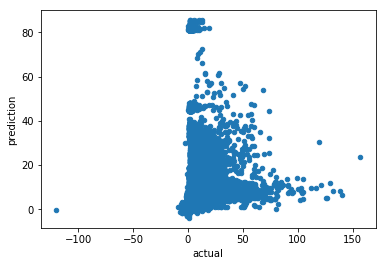

In [206]:
df_results.plot(x = 'actual', y = 'prediction', kind = 'scatter')

In [32]:
df_results[df_results['actual'] < -10]

prediction  actual    abs_diff        diff  pct_diff  pct_abs_diff  \
586109   -0.366667  -120.0  119.633333 -119.633333  0.996944     -0.996944   

        CLNDR_MTH_NUM  C445_WK_NUM  C445_YR_NUM  STORE_ID  PRODUCT_ID  
586109              2            8         2017     26061     1594241

## Rolled up monthly results

In [70]:
df_results_month = df_results.groupby(['CLNDR_MTH_NUM','C445_YR_NUM','STORE_ID','PRODUCT_ID']).sum().reset_index()
df_results_month['abs_diff'] = abs(df_results_month['actual'] - df_results_month['prediction'])
df_results_month['pct_abs_diff'] = df_results_month['abs_diff']/df_results_month['actual']
df_results_month['diff'] = df_results_month['actual'] - df_results_month['prediction']
df_results_month['pct_diff'] = df_results_month['diff']/df_results_month['actual']

df_results_month = df_results_month.drop(['C445_WK_NUM'], axis = 1)
df_results_month['pct_diff'] = df_results_month['pct_diff'].replace([np.inf], 1)
df_results_month['pct_diff'] = df_results_month['pct_diff'].replace([-np.inf], -1)
df_results_month['pct_abs_diff'] = df_results_month['pct_abs_diff'].replace([np.inf], 1)
df_results_month['pct_abs_diff'] = df_results_month['pct_abs_diff'].replace([-np.inf], -1)


In [71]:
df_results_month['pct_diff'].mean()

-0.07862734423121404

In [72]:
df_results_month['pct_abs_diff'].mean()

0.19341368202230774

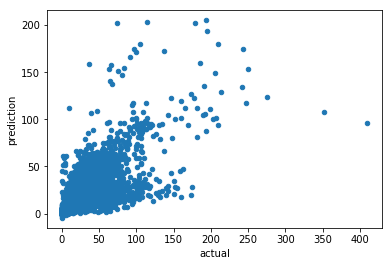

In [73]:
df_results_month[df_results_month['actual'] > 0].plot(x = 'actual', y = 'prediction', kind = 'scatter')

## Rolled up yearly results

In [74]:
df_results_year = df_results.groupby(['C445_YR_NUM','STORE_ID','PRODUCT_ID']).sum().reset_index()
df_results_year['abs_diff'] = abs(df_results_year['actual'] - df_results_year['prediction'])
df_results_year['diff'] = df_results_year['actual'] - df_results_year['prediction']
df_results_year['pct_diff'] = df_results_year['diff']/df_results_year['actual']
df_results_year['pct_abs_diff'] = df_results_year['abs_diff']/df_results_year['actual']

df_results_year = df_results_year.drop(['C445_WK_NUM','CLNDR_MTH_NUM'], axis = 1)
df_results_year['pct_diff'] = df_results_year['pct_diff'].replace([np.inf], 1)
df_results_year['pct_diff'] = df_results_year['pct_diff'].replace([-np.inf], -1)
df_results_year['pct_abs_diff'] = df_results_year['pct_abs_diff'].replace([np.inf], 1)
df_results_year['pct_abs_diff'] = df_results_year['pct_abs_diff'].replace([-np.inf], -1)

In [75]:
df_results_year['pct_diff'].mean()

-0.06453153091344171

In [76]:
df_results_year['pct_abs_diff'].mean()

0.12982740544455051

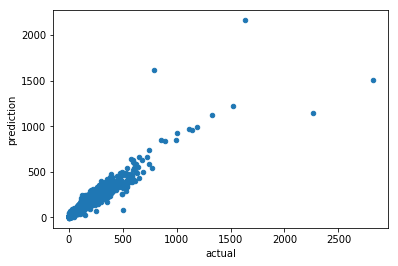

In [77]:
df_results_year[df_results_year['actual'] > 0].plot(x = 'actual', y = 'prediction', kind = 'scatter')

## Saving off Model

In [207]:
import pickle
# save the model to disk
filename = 'rfr_mops_modelB.sav'
pickle.dump(rfr, open(filename, 'wb'))

# save test set to disk
df_test.to_csv('mops_testB.csv')

# Reading in model

In [89]:
import pickle
filename = 'rfr_mops_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [90]:
predict2 = loaded_model.predict(df_test[features])

In [91]:
df_results2 = pd.DataFrame()
df_results2['prediction'] = predict2
df_results2['actual'] = df_test['QTY_SOLD'].values
df_results2['abs_diff'] = abs(df_results2['actual'] - df_results2['prediction'])
df_results2['diff'] = df_results2['actual'] - df_results2['prediction']
df_results2['pct_diff'] = df_results2['diff']/df_results2['actual']
df_results2['pct_abs_diff'] = df_results2['abs_diff']/df_results2['actual']
df_results2['pct_abs_diff'] = df_results2['pct_abs_diff'].replace([np.inf], 1)
df_results2['pct_abs_diff'] = df_results2['pct_abs_diff'].replace([-np.inf], -1)
df_results2['pct_diff'] = df_results2['pct_diff'].replace([np.inf], 1)
df_results2['pct_diff'] = df_results2['pct_diff'].replace([-np.inf], -1)
for col in key_cols:
    df_results2[col] = df_test[col].values

In [92]:
#model from this notebook
df_results['pct_diff'].mean()

-0.07861533102288433

In [93]:
#Loaded model confirming it is the same
df_results2['pct_diff'].mean()

-0.07861533102288433

In [96]:
features

['CLNDR_MTH_NUM',
 'C445_WK_NUM',
 'C445_YR_NUM',
 'PRODUCT_ID',
 'FINELINE_NM',
 'BRAND_NM',
 'ITEM_ACTUAL_SELLING_PRICE_AMT',
 'CLEARANCE_IND',
 'INSTORE_IND',
 'PROMO_IND',
 'REGULAR_IND',
 'REGULAR_PROMO_IND',
 'AVG_COMPT_PRICE',
 'SUM_COMPT_PRICE',
 'price_to_comp_ratio']